In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
%matplotlib inline

In [3]:
s=pd.DataFrame(np.random.randn(1000)+10,columns=['value'])

In [4]:
s

,value
0,10.874306
1,8.931953
2,9.879053
3,10.583107
4,8.769423
...,...
995,11.102022
996,9.692403
997,8.483057
998,9.884155


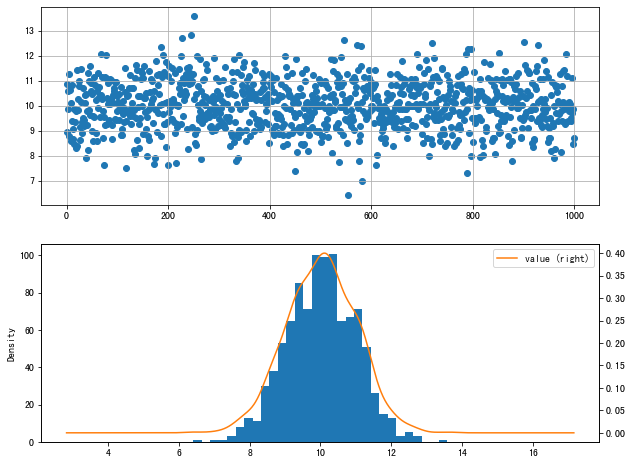

In [19]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
ax1.scatter(s.index,s['value'])
ax1.grid()

ax2=fig.add_subplot(212)
ax2.hist(s['value'],bins=30)
s.plot(kind='kde',ax=ax2,secondary_y=True)

In [20]:
s.head()

,value
0,10.874306
1,8.931953
2,9.879053
3,10.583107
4,8.769423


In [34]:
S=s.sort_values(by='value',ascending=True).reset_index()

In [26]:
s

,value
554,6.411510
581,7.000173
788,7.311178
449,7.367143
118,7.482521
...,...
900,12.556812
547,12.641943
227,12.727036
245,12.808420


In [28]:
mean=np.mean(s['value'])
std=np.std(s['value'])
mean,std

(10.028403118155452, 0.9811025218400056)

,value
554,6.411510
581,7.000173
788,7.311178
449,7.367143
118,7.482521
...,...
900,12.556812
547,12.641943
227,12.727036
245,12.808420


In [35]:
S

,index,value
0,554,6.411510
1,581,7.000173
2,788,7.311178
3,449,7.367143
4,118,7.482521
...,...,...
995,900,12.556812
996,547,12.641943
997,227,12.727036
998,245,12.808420


In [37]:
S['p']=(S.index-0.5)/len(S)
S

,index,value,p
0,554,6.411510,-0.0005
1,581,7.000173,0.0005
2,788,7.311178,0.0015
3,449,7.367143,0.0025
4,118,7.482521,0.0035
...,...,...,...
995,900,12.556812,0.9945
996,547,12.641943,0.9955
997,227,12.727036,0.9965
998,245,12.808420,0.9975


In [39]:
S['q']=(S['value']-mean)/std
S

,index,value,p,q
0,554,6.411510,-0.0005,-3.686560
1,581,7.000173,0.0005,-3.086558
2,788,7.311178,0.0015,-2.769563
3,449,7.367143,0.0025,-2.712520
4,118,7.482521,0.0035,-2.594919
...,...,...,...,...
995,900,12.556812,0.9945,2.577110
996,547,12.641943,0.9955,2.663881
997,227,12.727036,0.9965,2.750613
998,245,12.808420,0.9975,2.833564


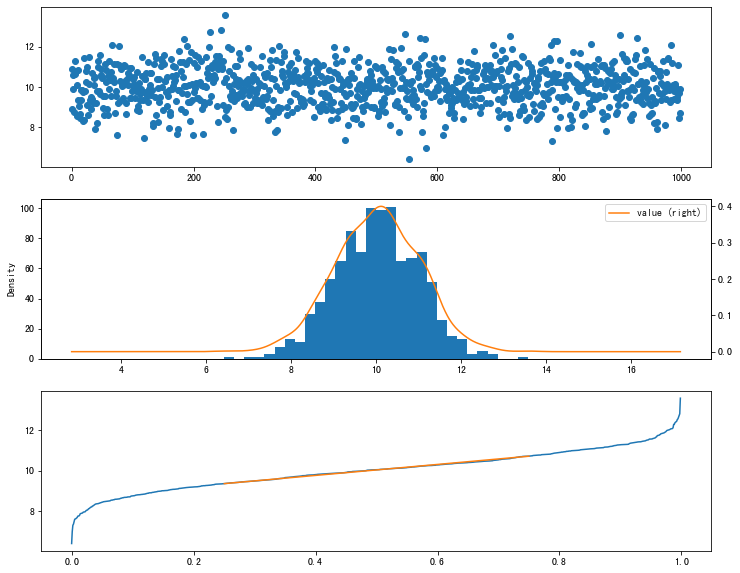

In [53]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(311)
ax1.scatter(s.index,s['value'])
ax2=fig.add_subplot(312)
ax2.hist(s.value,bins=30)
s.plot(kind='kde',ax=ax2,secondary_y=True)
ax3=fig.add_subplot(313)
ax3.plot(S.p,S.value)
ax3.plot([x1,x2],[y1,y2])

In [49]:
st=s['value'].describe()
st

count    1000.000000
mean       10.028403
std         0.981593
min         6.411510
25%         9.365160
50%        10.050353
75%        10.717125
max        13.577762
Name: value, dtype: float64

In [51]:
x1,y1=0.25,st['25%']
x2,y2=0.75,st['75%']

In [54]:
from scipy import stats

In [57]:
data=np.array(np.random.randint(70,90,35))

In [58]:
data

array([72, 73, 84, 76, 70, 89, 76, 73, 78, 73, 80, 82, 73, 87, 88, 73, 78,
       83, 77, 72, 79, 74, 75, 78, 73, 70, 87, 85, 79, 77, 83, 84, 83, 79,
       89])

In [59]:
mean=np.mean(data)
std=np.std(data)
mean,std

(78.62857142857143, 5.591246803381741)

In [67]:
s=np.sort(data)
s

array([70, 70, 72, 72, 73, 73, 73, 73, 73, 73, 74, 75, 76, 76, 77, 77, 78,
       78, 78, 79, 79, 79, 80, 82, 83, 83, 83, 84, 84, 85, 87, 87, 88, 89,
       89])

In [69]:
data=pd.DataFrame(np.random.randint(80,90,35),columns=['value'])
data.head()

,value
0,88
1,84
2,84
3,80
4,87


In [70]:
mean=np.mean(data['value'])
std=np.std(data['value'])
mean,std

(84.71428571428571, 2.5475077857324306)

In [78]:
s=data['value'].value_counts().sort_index()
s

80    2
81    3
82    3
83    4
84    6
85    1
86    2
87    9
88    5
Name: value, dtype: int64

In [87]:
df_s=pd.DataFrame({'浓度':s.index,'次数':s.values})
df_s['累计次数']=df_s['次数'].cumsum()
df_s['累计频率']=df_s['累计次数']/df_s['次数'].sum()
df_s['标准化']=(df_s['浓度']-mean)/std

In [88]:
df_s

,浓度,次数,累计次数,累计频率,标准化
0,80,2,2,0.057143,-1.850548
1,81,3,5,0.142857,-1.458008
2,82,3,8,0.228571,-1.065467
3,83,4,12,0.342857,-0.672927
4,84,6,18,0.514286,-0.280386
5,85,1,19,0.542857,0.112154
6,86,2,21,0.600000,0.504695
7,87,9,30,0.857143,0.897235
8,88,5,35,1.000000,1.289776


In [10]:
import sympy
from math import exp
def normal_distribution_integration(limit):
    x = sympy.Symbol('x')
    fx=(1/(2*np.pi)**0.5)*(exp((-x**2/2)))
    y = sympy.integrate(fx, (x, -float('inf'), limit))
    return (float(y))

In [11]:
normal_distribution_integration(1)

TypeError: can't convert expression to float